In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

In [2]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 데이터 살펴보기

## 1.1. 데이터 준비

In [3]:
# 데이터 준비 - 로드
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/sample_submission.csv')

## 1.2. 데이터 확인

In [4]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [5]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [6]:
submission.head()

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0
3,2021-04-04,0
4,2021-04-05,0


In [7]:
train.shape

(273, 10)

## 2. EDA

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 2.1. Target

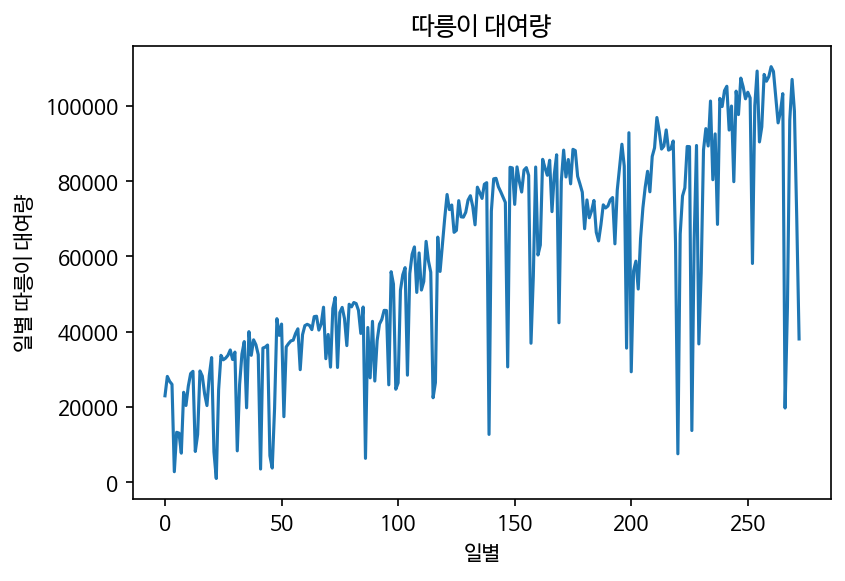

In [11]:
plt.figure(dpi=150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title("따릉이 대여량")
plt.xlabel("일별")
plt.ylabel("일별 따릉이 대여량")
plt.plot(x, y)
plt.show()

### 인사이트

1. 시간이 흐를 수록 대여량이 증가하고 있다.
2. 이상치가 존재한다 -> 날씨에 영향을 받은것일까?
3. 평일에는 출근을 하니까 대여량이 주말보다 많을 것이다.

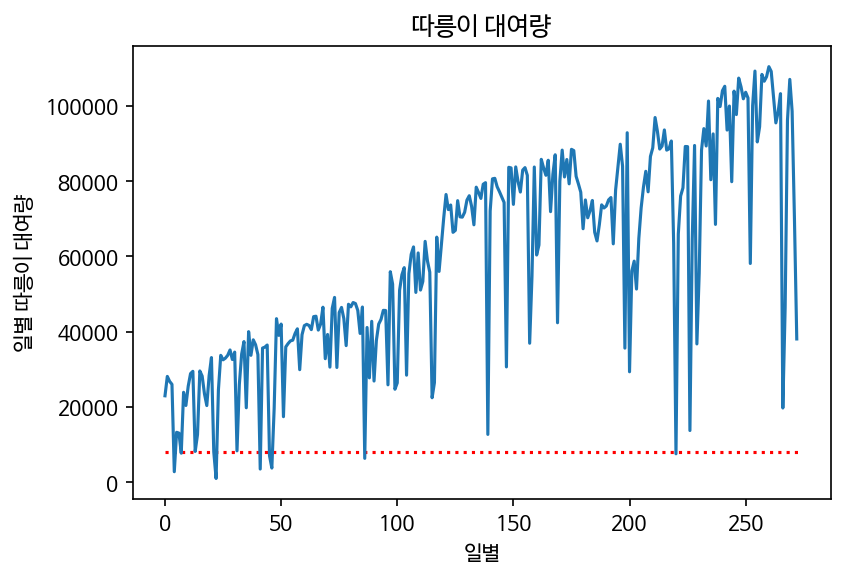

In [13]:
plt.figure(dpi=150)

x = train['number_of_rentals'].index
y = train['number_of_rentals'].values

plt.title("따릉이 대여량")
plt.xlabel("일별")
plt.ylabel("일별 따릉이 대여량")
plt.hlines(y=8000, xmin=0, xmax=len(x), color='red', linestyle='dotted')
plt.plot(x, y)
plt.show()

## 2.2. 따릉이 대여량이 8000이하인 값과 초과인 값의 Feature 비교

In [14]:
train[train['number_of_rentals']<=8000]

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
7,2018-04-08,200.939,2.405,0.054,3.865,53.243,4.312,14.211,15.676,7758
22,2018-04-23,79.554,4.000,1.000,4.127,81.182,9.250,15.158,75.608,1037
41,2018-05-12,154.541,3.946,0.588,2.590,75.405,13.938,21.632,54.392,3551
45,2018-05-16,191.108,4.000,0.797,2.815,85.405,19.688,23.105,66.554,7072
46,2018-05-17,205.378,4.000,1.000,2.451,88.885,16.062,22.526,79.257,3802
86,2018-06-26,181.939,3.851,0.723,3.526,76.351,21.125,26.789,64.865,6391
220,2020-05-09,144.142,4.000,1.000,4.192,80.034,13.938,21.158,82.162,7600


In [15]:
train[train['number_of_rentals']<=8000].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


wind_direction                156.688250
sky_condition                   3.775250
precipitation_form              0.735625
wind_speed                      3.344000
humidity                       76.786125
low_temp                       13.023500
high_temp                      19.375000
Precipitation_Probability      62.736500
number_of_rentals            5005.500000
dtype: float64

In [16]:
train[train['number_of_rentals']>8000].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


wind_direction                 204.141540
sky_condition                    2.243366
precipitation_form               0.081804
wind_speed                       2.454909
humidity                        56.140491
low_temp                        13.818547
high_temp                       23.505781
Precipitation_Probability       15.493698
number_of_rentals            61222.358491
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


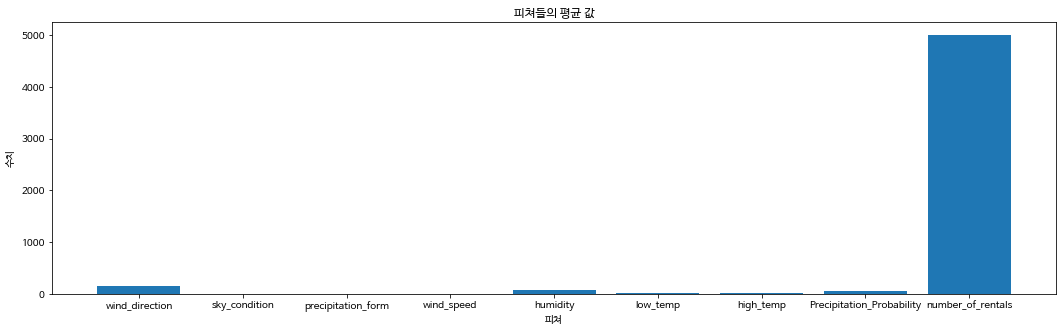

In [17]:
x = train[train['number_of_rentals']<=8000].mean().index
y = train[train['number_of_rentals']<=8000].mean().values

plt.figure(figsize = (18,5))
plt.title("피쳐들의 평균 값")
plt.xlabel("피쳐")
plt.ylabel("수치")
plt.bar(x, y)
plt.show()

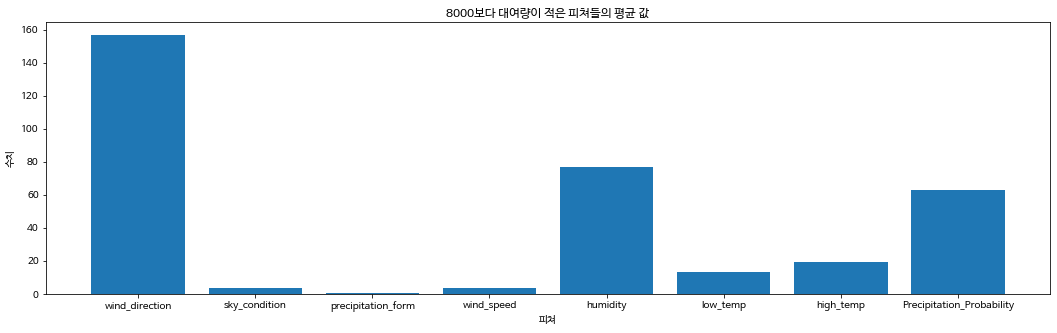

In [19]:
x = train[train['number_of_rentals']<=8000].drop(['date_time', 'number_of_rentals'], axis = 1).mean().index
y = train[train['number_of_rentals']<=8000].drop(['date_time', 'number_of_rentals'], axis = 1).mean().values

plt.figure(figsize = (18,5))
plt.title("8000보다 대여량이 적은 피쳐들의 평균 값")
plt.xlabel("피쳐")
plt.ylabel("수치")
plt.bar(x, y)
plt.show()

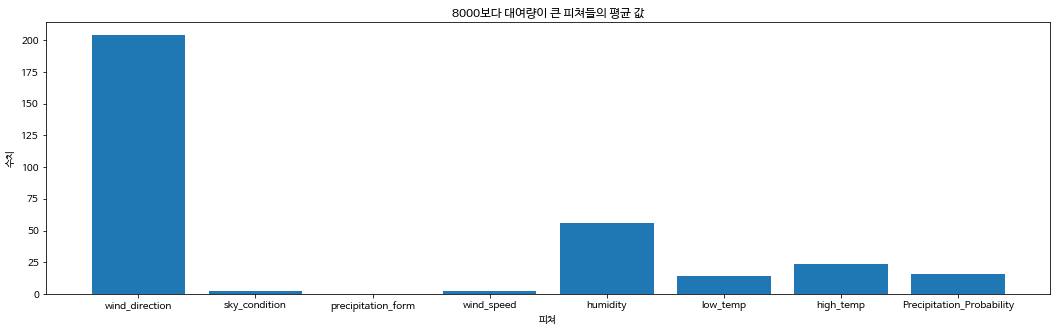

In [20]:
x = train[train['number_of_rentals']>8000].drop(['date_time', 'number_of_rentals'], axis = 1).mean().index
y = train[train['number_of_rentals']>8000].drop(['date_time', 'number_of_rentals'], axis = 1).mean().values

plt.figure(figsize = (18,5))
plt.title("8000보다 대여량이 큰 피쳐들의 평균 값")
plt.xlabel("피쳐")
plt.ylabel("수치")
plt.bar(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


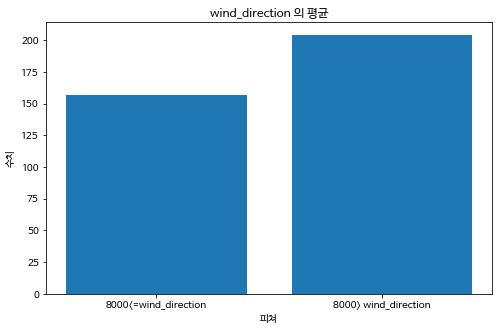

In [30]:
low = train[train['number_of_rentals']<=8000].mean()
high = train[train['number_of_rentals']>8000].mean()

x = ['8000<=' + low.index[0], '8000> ' + high.index[0]]
y = [low.values[0], high.values[0]]

plt.figure(figsize = (8,5))
plt.title(low.index[0]+ " 의 평균")
plt.xlabel('피쳐')
plt.ylabel('수치')
plt.bar(x, y)
plt.show()

In [ ]:
low = train[train['number_of_rentals']<=8000].mean()
high = train[train['number_of_rentals']>8000].mean()

x = ['8000<=' + low.index[0], '8000> ' + high.index[0]]
y = [low.values[0], high.values[0]]

plt.figure(figsize = (8,5))
plt.title(low.index[0]+ " 의 평균")
plt.xlabel('피쳐')
plt.ylabel('수치')
plt.bar(x, y)
plt.show()

In [31]:
def compare(idx):
  x = ['8000<=' + low.index[idx], '8000> ' + high.index[idx]]
  y = [low.values[idx], high.values[idx]]

  plt.figure(figsize = (8,5))
  plt.title(low.index[idx]+ " 의 평균")
  plt.xlabel('피쳐')
  plt.ylabel('수치')
  plt.bar(x, y)
  plt.show()

# 풍향 비교

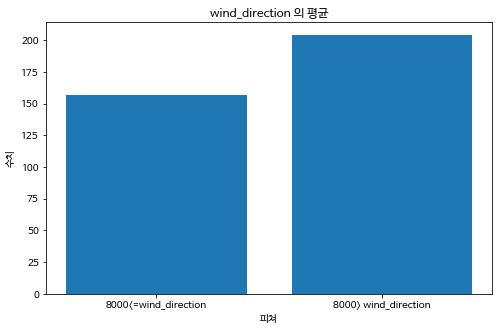

In [32]:
compare(0)

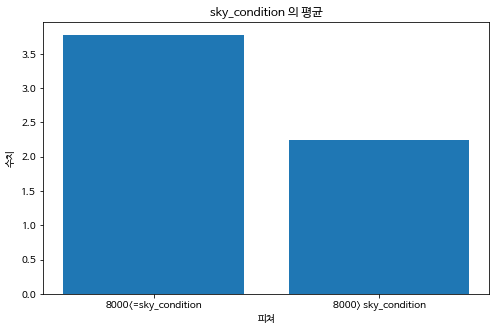

In [33]:
compare(1)

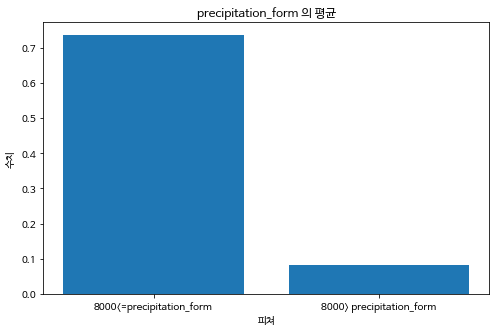

In [34]:
compare(2)

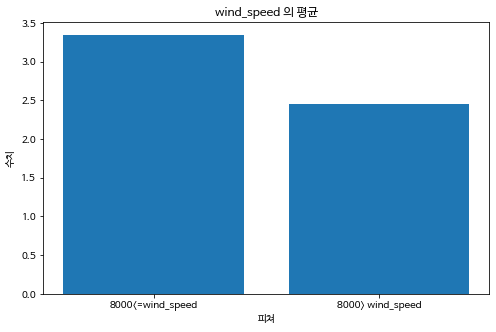

In [35]:
compare(3)

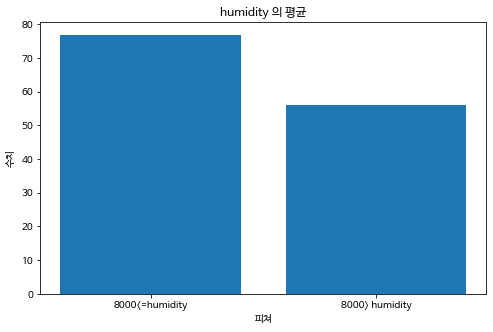

In [36]:
compare(4)

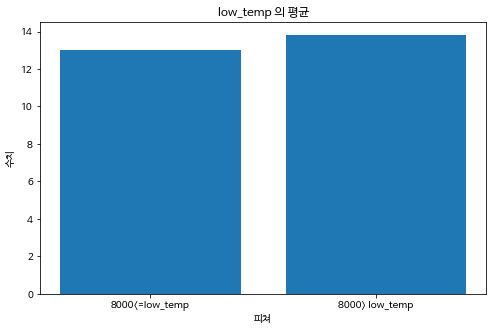

In [37]:
compare(5)

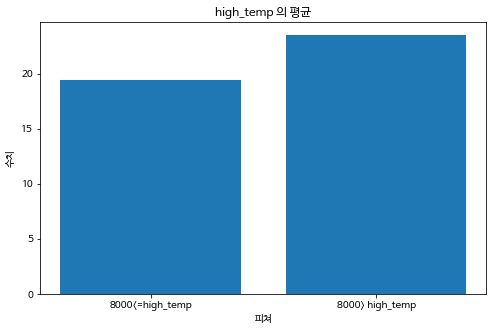

In [38]:
compare(6)

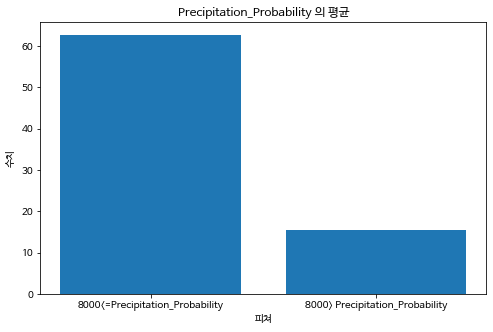

In [39]:
compare(7)

### 인사이트

강수형태와 강수확률에 따릉이 대여량에 따라서 큰 차이가 있는 것을 확인

## 2.3. 통계치 분석 시각화 EDA

In [40]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


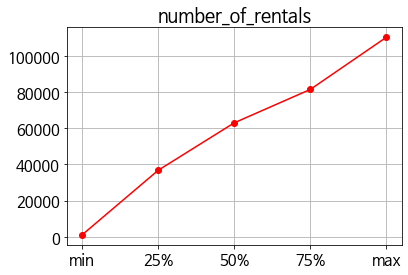

In [41]:
plt.rcParams['font.size'] = 15
data = train.describe().loc['min':'max', 'number_of_rentals']

plt.title('number_of_rentals')
plt.plot(data, color = 'red', marker = 'o')
plt.grid(True)

In [42]:
def describ(name):
  plt.rcParams['font.size'] = 15
  data = train.describe().loc['min':'max', name]

  plt.title(name)
  plt.plot(data, color = 'red', marker = 'o')
  plt.grid(True)

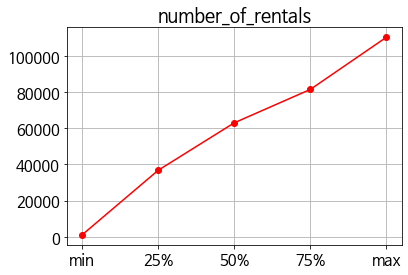

In [43]:
describ('number_of_rentals')

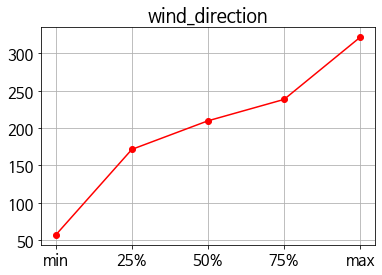

In [44]:
describ('wind_direction')

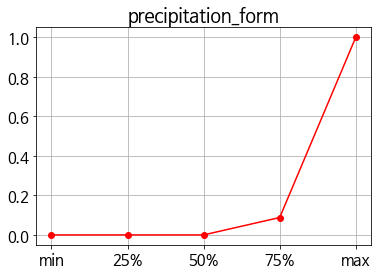

In [45]:
describ('precipitation_form')

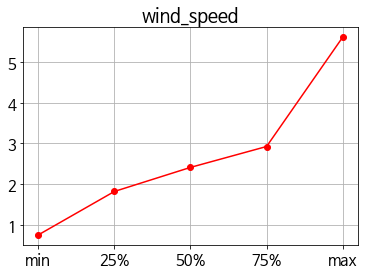

In [46]:
describ('wind_speed')

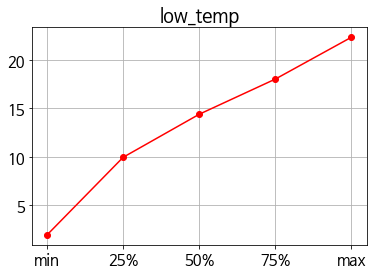

In [47]:
describ("low_temp")

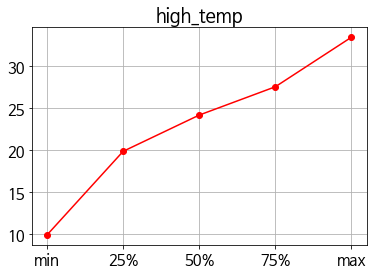

In [48]:
describ("high_temp")

### 인사이트

강수 형태 precipitation_form은 최솟값부터 75% 구간까지는 평탄한 것에 비해
75%~max 까지는 급격한 폭이 보인다.

-> 다시 살펴보기

### 2.3.2. precipitation_form 그래프

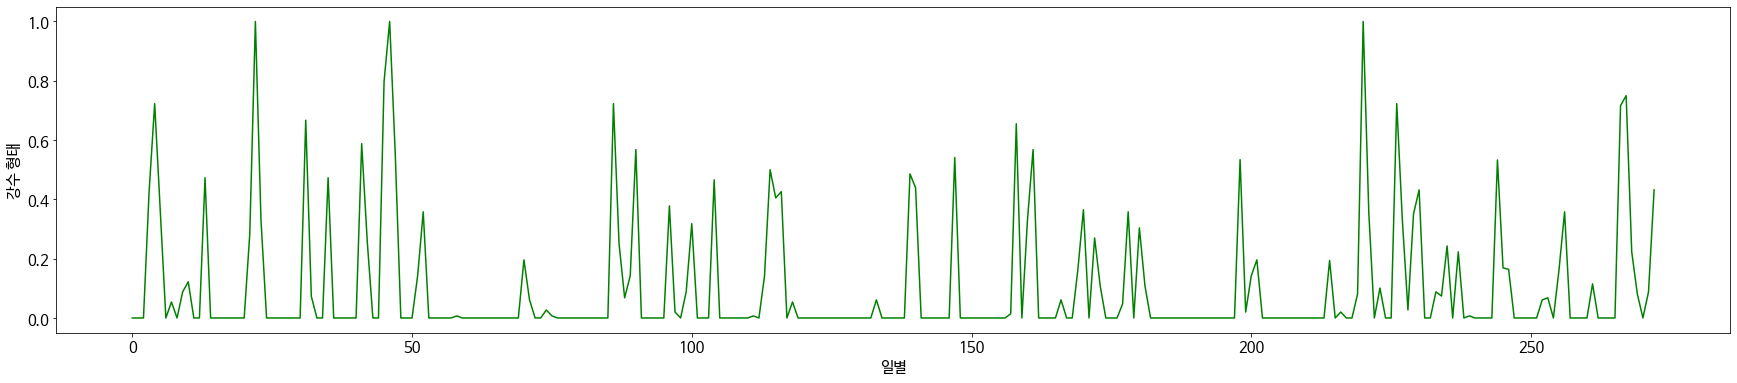

In [51]:
plt.figure(figsize=(30,6))

plt.plot(train['precipitation_form'], color = 'g')

plt.ylabel('강수 형태')
plt.xlabel('일별')
plt.show()

## 2.4. 가설 검정

분석 시작전 세웠던 가설

1. 따릉이 대여량은 '강수 여부'에 큰 영향을 받을 것이다.
2. '풍속'이 강한 날은 대여량이 낮아질 것이다.
3. '최저 기온'이 낮은 날에는 따릉이 대여량이 낮아질 것이다.

### 2.4.1. 가설1 : 따릉이 대여량은 '강수 여부'에 큰 영향을 받을 것이다.

Text(0, 0.5, '따릉이 대여량')

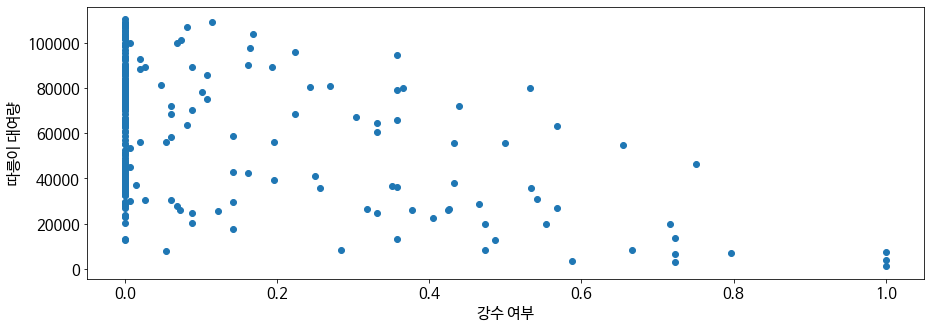

In [52]:
plt.figure(figsize=(15,5))
plt.scatter(y = train['number_of_rentals'], x = train['precipitation_form'])
plt.xlabel('강수 여부')
plt.ylabel('따릉이 대여량')

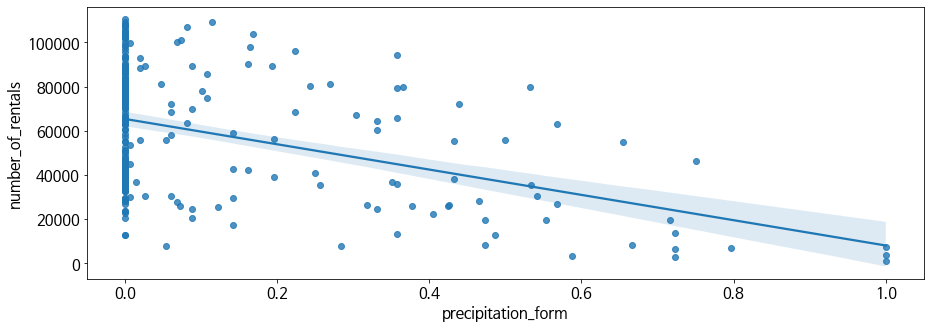

In [53]:
import seaborn as sns

plt.figure(figsize= (15,5))
sns.regplot(x='precipitation_form', y='number_of_rentals', data=train)

### 2.4.2. 가설 2 : '풍속'이 강한 날은 대여량이 낮아질 것이다.

Text(0, 0.5, '따릉이 대여량')

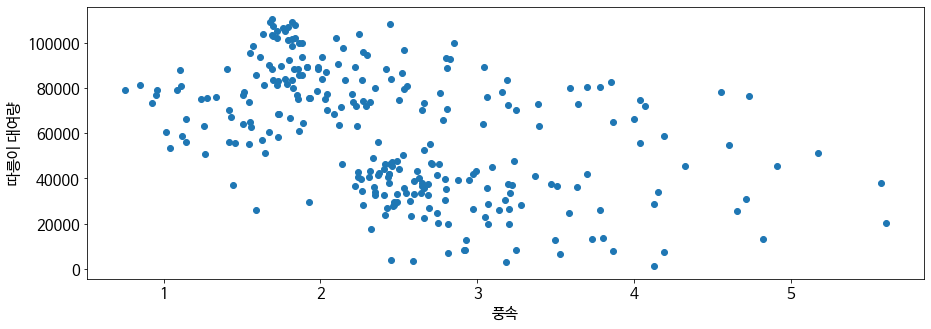

In [54]:
plt.figure(figsize=(15,5))
plt.scatter(y = train['number_of_rentals'], x = train['wind_speed'])
plt.xlabel('풍속')
plt.ylabel('따릉이 대여량')

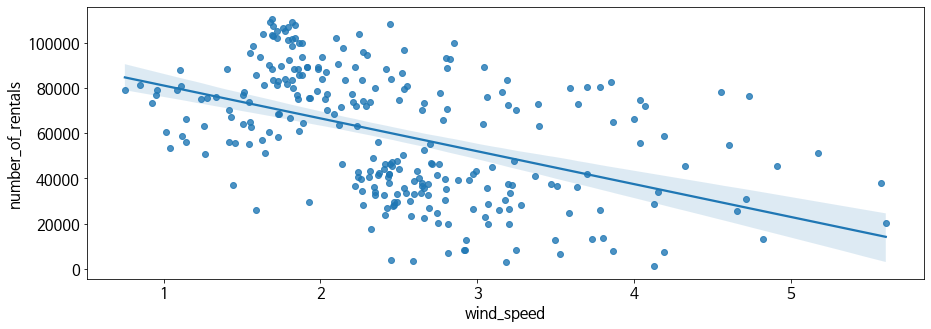

In [55]:
plt.figure(figsize= (15,5))
sns.regplot(x='wind_speed', y='number_of_rentals', data=train)

### 2.4.3. 가설3 : '최저 기온'이 낮은 날에는 따릉이 대여량이 낮아질 것이다.

Text(0, 0.5, '따릉이 대여량')

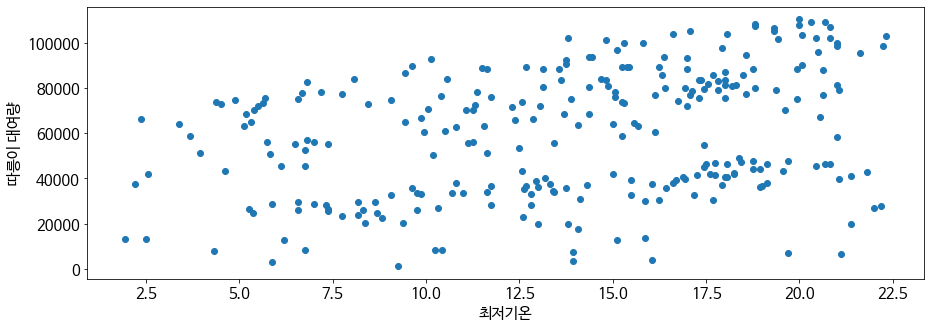

In [57]:
plt.figure(figsize=(15,5))
plt.scatter(y = train['number_of_rentals'], x = train['low_temp'])
plt.xlabel('최저기온')
plt.ylabel('따릉이 대여량')

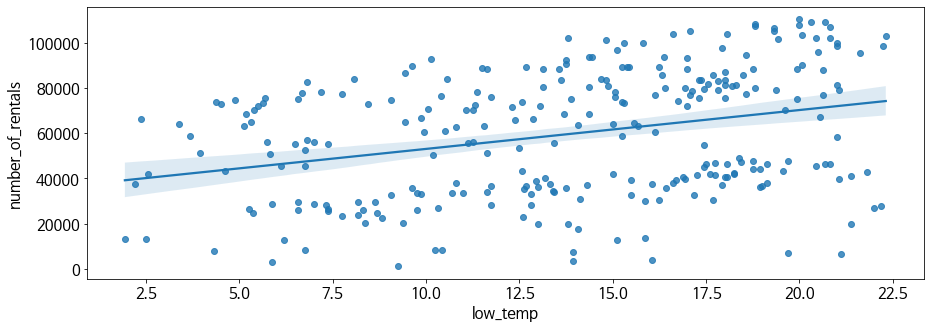

In [58]:
plt.figure(figsize= (15,5))
sns.regplot(x='low_temp', y='number_of_rentals', data=train)

### 인사이트

시각화를 통하여 강수 형태, 풍속, 최저 기온이 따릉이 대여량에 영향을 미친다는 것을 파악!

# 3. 데이터 처리

## 3.1 Feature Engineering 

In [59]:
#drop() 메소드를 이용하여 열(date_time) 제거
train = train.drop(['date_time'], axis = 1)
test = test.drop(['date_time'], axis = 1)

## 3.2. Feature Selection

In [60]:
# 독립변수 = Feature = X
# 종속변수 = Target = y

#학습에 사용할 변수 X를 할당
X = train[['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
           'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability']]

# X 데이터 확인
X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378


In [61]:
# y 할당
y = train['number_of_rentals']

# y 데이터 확인
y.head()

0    22994
1    28139
2    26817
3    26034
4     2833
Name: number_of_rentals, dtype: int64

# 4. 모델링

## 4.1. 모델 선택

In [62]:
from sklearn.ensemble import RandomForestRegressor

#모델 선언
model = RandomForestRegressor()

## 4.2. 모델 학습

In [63]:
#모델 학습
model.fit(X,y)

RandomForestRegressor()

## 4.3. 예측

In [64]:
predict = model.predict(test)

In [65]:
print('------예측된 데이터 상위 10개의 값 확인------')
print(predict[:10])

------예측된 데이터 상위 10개의 값 확인------
[54720.1  40286.01 45640.44 29468.71 66932.16 62641.91 71196.48 61968.27
 66520.37 75047.92]


## 5. 데이콘 제출하기

In [66]:
submission['number_of_rentals'] = predict

submission.head()

,date_time,number_of_rentals
0,2021-04-01,54720.10
1,2021-04-02,40286.01
2,2021-04-03,45640.44
3,2021-04-04,29468.71
4,2021-04-05,66932.16


In [67]:
submission.to_csv('submission3.csv', index =False)